In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas as pd

In [73]:
sns.set(rc={'figure.figsize':(16,6)})

In [63]:
sns.set()

In [3]:
dist = np.random.binomial(4, .75, 10000)
print(dist)

[4 2 3 ... 3 1 3]


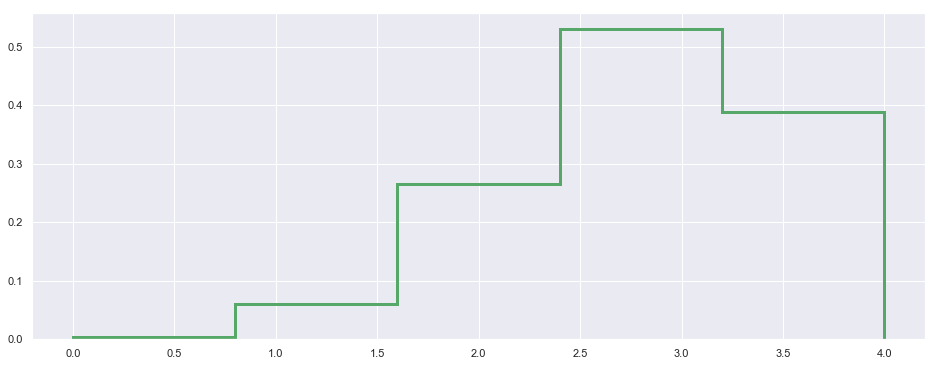

In [74]:
sns.distplot(dist, kde=False, bins=5, norm_hist=True, hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1, "color": "g"})

In [17]:
xArr = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
yArr = [posteriorP1(x, 3, 4) for x in xArr]

##### Posterior values changed for each coin flip described in part 1c)

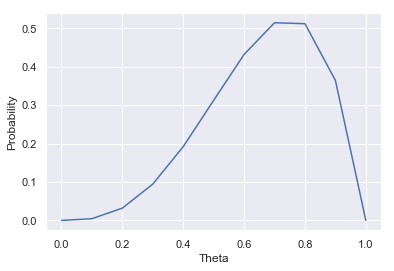

In [18]:
plt.ylabel("Probability")
plt.xlabel("Theta")
plt.plot(xArr, yArr)
plt.show()

In [6]:
def posteriorP1(theta, y, n):
    return (1+n) * (theta**y) * (1-theta)**(n-y)

## Part 2

In [20]:
#Generate the random distributions given the probability of cherry candies 
def generateData(probability):
    num_cherries = np.random.binomial(100, probability, 1)
    num_limes = 100 - num_cherries[0]
    candies = [0]*num_cherries[0]
    if (num_limes != 0):
        candies.extend([1]*num_limes)
    np.random.shuffle(candies)
    candies = ['cherry' if x==0 else 'lime' for x in candies]
    return candies

### h1) 100% cherry

In [262]:
#Generates the probability list for each candy in the candy list, given the individual proability of picking each candy
def generateCandyProbabilities(candyList, cherry_probabilities, lime_probabilities):
    posterior = {
        "h1": [],
        "h2": [],
        "h3": [],
        "h4": [],
        "h5": []
    }
    for candy in candyList:
        prob = cherry_probabilities
        if (candy == "lime"):
            prob = lime_probabilities
        posterior['h1'].append(prob[0])
        posterior['h2'].append(prob[1])
        posterior['h3'].append(prob[2])
        posterior['h4'].append(prob[3])
        posterior['h5'].append(prob[4])
    return posterior

In [302]:
"""
Takes a prob corresponding to the hypothesis specified probability to pick cherry, and returns a dataframe
containing the normalized posterior probabilities indexed by the number of samples
"""
def generatePosteriorDF(prob, return_bayesian=False, multiple_datasets=False):
    candyList = generateData(prob)
    candyList2 = generateData(prob)
    candyList3 = generateData(prob)
    cherry_probabilities = [1, 0.75, 0.5, 0.25, 0]
    lime_probabilities = cherry_probabilities.copy()
    lime_probabilities.reverse()
    h_probabilities = [0.1, 0.2, 0.4, 0.2, 0.1]
    
    posterior = generateCandyProbabilities(candyList, cherry_probabilities, lime_probabilities)
    if multiple_datasets:
        posterior2 = generateCandyProbabilities(candyList, cherry_probabilities, lime_probabilities)
        posterior3 = generateCandyProbabilities(candyList, cherry_probabilities, lime_probabilities)
    else:
        posterior2 = posterior
        posterior3 = posterior

    norm_probabilities = {
        "h1": [],
        "h2": [],
        "h3": [],
        "h4": [],
        "h5": []
    }
    bayesian_predictions = {
        "h1": [],
        "h2": [],
        "h3": [],
        "h4": [],
        "h5": []
    }
    
    for i in range(100):
        h1_posteriors = np.prod(posterior["h1"][0:i]) + np.prod(posterior2["h1"][0:i]) + np.prod(posterior3["h1"][0:i])
        h2_posteriors = np.prod(posterior["h2"][0:i]) + np.prod(posterior2["h2"][0:i]) + np.prod(posterior3["h2"][0:i])
        h3_posteriors = np.prod(posterior["h3"][0:i]) + np.prod(posterior2["h3"][0:i]) + np.prod(posterior3["h3"][0:i])
        h4_posteriors = np.prod(posterior["h4"][0:i]) + np.prod(posterior2["h4"][0:i]) + np.prod(posterior3["h4"][0:i])
        h5_posteriors = np.prod(posterior["h5"][0:i]) + np.prod(posterior2["h5"][0:i]) + np.prod(posterior3["h5"][0:i])
        h1_prob = (h1_posteriors * h_probabilities[0])/3
        h2_prob = (h2_posteriors * h_probabilities[1])/3
        h3_prob = (h3_posteriors * h_probabilities[2])/3
        h4_prob = (h4_posteriors * h_probabilities[3])/3
        h5_prob = (h5_posteriors * h_probabilities[4])/3
        prob_sum = h1_prob + h2_prob + h3_prob + h4_prob + h5_prob
        norm_probabilities["h1"].append(h1_prob/prob_sum)
        norm_probabilities["h2"].append(h2_prob/prob_sum)
        norm_probabilities["h3"].append(h3_prob/prob_sum)
        norm_probabilities["h4"].append(h4_prob/prob_sum)
        norm_probabilities["h5"].append(h5_prob/prob_sum)
        bayesian_predictions["h1"].append(0 * (norm_probabilities["h1"][i]))
        bayesian_predictions["h2"].append(0.25 * (norm_probabilities["h2"][i]))
        bayesian_predictions["h3"].append(0.5 * (norm_probabilities["h3"][i]))
        bayesian_predictions["h4"].append(0.75 * (norm_probabilities["h4"][i]))
        bayesian_predictions["h5"].append(1 * (norm_probabilities["h5"][i]))

    x_ax = range(100)
    y_ax = norm_probabilities["h4"]
    dataF = pd.DataFrame({
        'Number of Trials': x_ax,
        'H1': norm_probabilities["h1"],
        'H2': norm_probabilities["h2"],
        'H3': norm_probabilities["h3"],
        'H4': norm_probabilities["h4"],
        'H5': norm_probabilities["h5"],
    })
    dataB = pd.DataFrame({
        'Number of Trials': x_ax,
        'H1': bayesian_predictions["h1"],
        'H2': bayesian_predictions["h2"],
        'H3': bayesian_predictions["h3"],
        'H4': bayesian_predictions["h4"],
        'H5': bayesian_predictions["h5"],
    })
    
    if (return_bayesian):
        return dataB
    else:
        return dataF

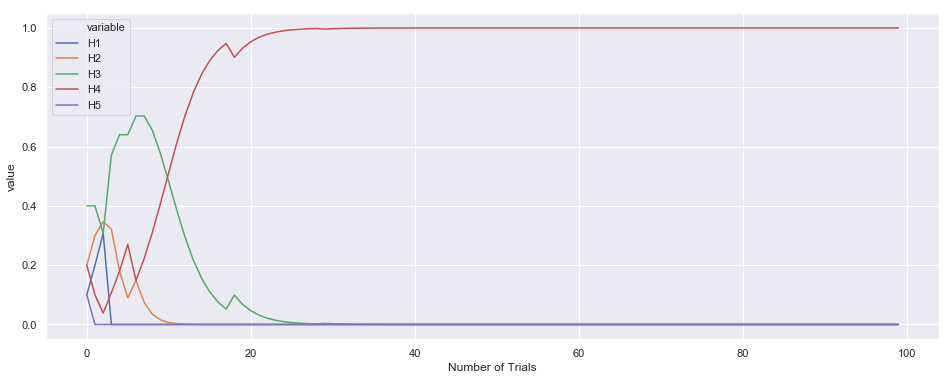

In [299]:
#Change value of probability here to iterate through all hypothesis (0, 0.25, 0.5, 0.75, 1)
dataF = generatePosteriorDF(0.25, multiple_datasets=True)
sns.lineplot(x='Number of Trials', y='value', hue='variable', 
             data=pd.melt(dataF, ['Number of Trials']))

In [303]:
#Dataframe generated with posterior probabilities
dataF

,Number of Trials,H1,H2,H3,H4,H5
0,0,0.100000,2.000000e-01,4.000000e-01,0.200000,0.1
1,1,0.200000,3.000000e-01,4.000000e-01,0.100000,0.0
2,2,0.307692,3.461538e-01,3.076923e-01,0.038462,0.0
3,3,0.000000,3.214286e-01,5.714286e-01,0.107143,0.0
4,4,0.000000,1.800000e-01,6.400000e-01,0.180000,0.0
5,5,0.000000,9.000000e-02,6.400000e-01,0.270000,0.0
6,6,0.000000,1.483516e-01,7.032967e-01,0.148352,0.0
7,7,0.000000,7.417582e-02,7.032967e-01,0.222527,0.0
8,8,0.000000,3.452685e-02,6.547315e-01,0.310742,0.0
9,9,0.000000,1.516854e-02,5.752809e-01,0.409551,0.0


##### Cumulative probability of picking a lime candy

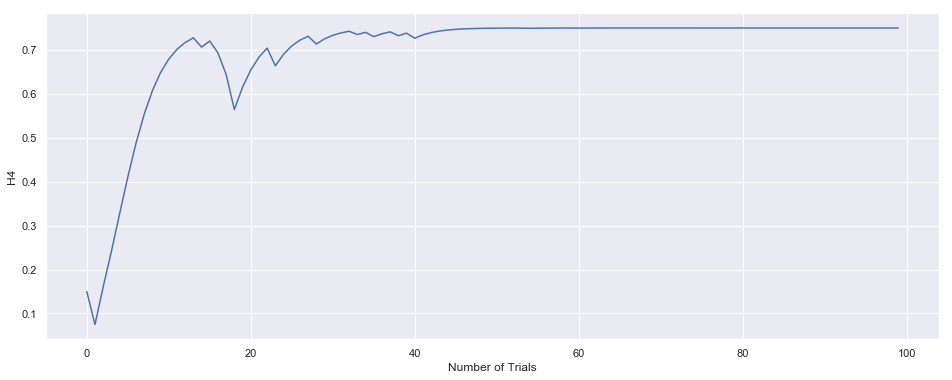

In [260]:
dataB = generatePosteriorDF(.25, True)
sns.lineplot(x='Number of Trials', y='H4', 
             data=dataB)